
Training Confusion Matrix:
  [[24195  3216]
 [  808  2672]]

Testing Confusion Matrix:
  [[7785 1352]
 [ 478  682]]

Training Accuracy Score:  0.8697355216729792

Testing Accuracy Score:  0.8222783334951927

Training Precision:  0.453804347826087

Testing Precision:  0.3352999016715831

Training Recall:  0.767816091954023

Testing Recall:  0.5879310344827586

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92     27411
           1       0.45      0.77      0.57      3480

   micro avg       0.87      0.87      0.87     30891
   macro avg       0.71      0.83      0.75     30891
weighted avg       0.91      0.87      0.88     30891


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      9137
           1       0.34      0.59      0.43      1160

   micro avg       0.82      0.82      0.82     10297
   macro avg       0.64      0

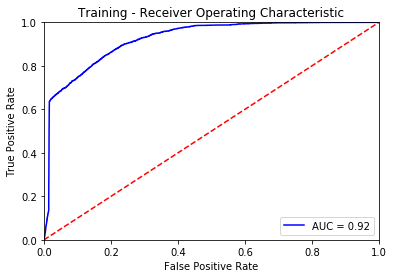

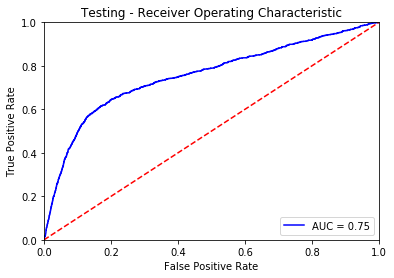

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import pickle

from src.evaluate import evaluate

df_train = pd.read_csv('./data/final/final_standardized_train.csv')
df_test = pd.read_csv('./data/final/final_standardized_test.csv')

df_train_class = pd.DataFrame(df_train['y'])
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

svm_model_final = SVC(C = 1.5, gamma = 0.05, kernel = 'rbf', class_weight='balanced', probability=True)

svm_model_final.fit(df_train_features, df_train_class.values.ravel())

predicted_train = svm_model_final.predict(df_train_features)
predicted_test = svm_model_final.predict(df_test_features)

predicted_prob_train = np.array([])
predicted_prob_test = np.array([])

predicted_prob_train = svm_model_final.predict_proba(df_train_features)
predicted_prob_test  = svm_model_final.predict_proba(df_test_features)

evaluate(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')

with open('./models/svm/final_svm_standardized_model.sav', 'wb') as f:
    pickle.dump(svm_model_final, f)


Training Confusion Matrix:
  [[23732  3679]
 [ 1249  2231]]

Testing Confusion Matrix:
  [[7826 1311]
 [ 462  698]]

Training Accuracy Score:  0.8404713346929527

Testing Accuracy Score:  0.8278139263863261

Training Precision:  0.3774957698815567

Testing Precision:  0.3474365355898457

Training Recall:  0.6410919540229885

Testing Recall:  0.6017241379310345

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91     27411
           1       0.38      0.64      0.48      3480

   micro avg       0.84      0.84      0.84     30891
   macro avg       0.66      0.75      0.69     30891
weighted avg       0.89      0.84      0.86     30891


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      9137
           1       0.35      0.60      0.44      1160

   micro avg       0.83      0.83      0.83     10297
   macro avg       0.65     

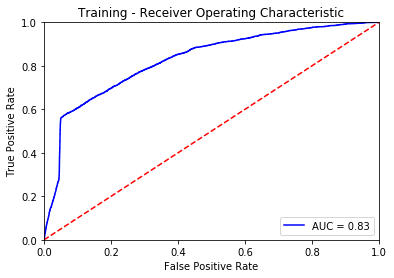

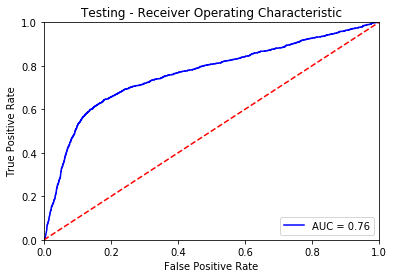

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import pickle
from sklearn.decomposition import PCA

from src.evaluate import evaluate

df_train = pd.read_csv('./data/final/final_standardized_train.csv')
df_test = pd.read_csv('./data/final/final_standardized_test.csv')

df_train_class = pd.DataFrame(df_train['y'])
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

pca_model = PCA(n_components=5)
pca_model.fit(df_train_features)
df_train_features = pd.DataFrame(pca_model.transform(df_train_features))
df_test_features = pd.DataFrame(pca_model.transform(df_test_features))

svm_model_final = SVC(C = 1.5, gamma = 0.05, kernel = 'rbf', class_weight='balanced', probability=True)

svm_model_final.fit(df_train_features, df_train_class.values.ravel())

predicted_train = svm_model_final.predict(df_train_features)
predicted_test = svm_model_final.predict(df_test_features)

predicted_prob_train = np.array([])
predicted_prob_test = np.array([])

predicted_prob_train = svm_model_final.predict_proba(df_train_features)
predicted_prob_test  = svm_model_final.predict_proba(df_test_features)

evaluate(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')

with open('./models/svm/final_svm_standardized_model_pca.sav', 'wb') as f:
    pickle.dump(svm_model_final, f)